# 5.- Cleansed Chilton f0F2 time series EDA - High Solar Activity
## July 2022
### Dr Jose M Albornoz

In this notebook we filter a dataset containing hourly values of f0F2 plus hourly values of the solar and geomagnetic parameters that influence electron content in the ionosphere; this filtering is done for a period of high solar activity. Periods of low and enhanced geomagnetic activity are identified for the reduced solar activity dataset.

# Import necessary modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm
style.use('fivethirtyeight')
%matplotlib inline

import random
import time

RANDOM_STATE = 801
pd.options.mode.chained_assignment = None

# maximum number of rdataframe ows and columns displayed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Data Dictionary

Solar & geomagnetic data was downloaded from NASA’s Space Physics Data Facility (SPDF) OMNI (Operating Missions as a Node on the Internet) https://omniweb.gsfc.nasa.gov/form/dx1.html. The following parameters are included in this dataset:

- **Timestamp**: hourly timestamp in format YYYY-mm-DD HH:MM:SS
- **f0f2**: F2 critical frquency, MHz    
- **Scalar B, nt**: Average Scalar Interplanetary Magnetic Field (IMF). A combined measure of the magnetic field strength in the north-south, east-west, and towards-Sun vs. away-from-Sun directions (https://www.spaceweatherlive.com/en/help/the-interplanetary-magnetic-field-imf.html).
- **Vector B Magnitude, nt**: Magnitude of IMF vector, $|<B>|$
- **Bx, By, Bz**: IMF components in Geocentric Solar Ecliptic (GSE) and Geocentric Solar Magnetospheric (GSM) coordiantes (https://www.spenvis.oma.be/help/background/coortran/coortran.html#GSE)
- **RMS_magnitude, nt**: RMS standard deviation in average IMF magnitude
- **RMS_field_vector, nT**: RMS standard deviation in IMF vector
- **RMS_BX_GSE, RMS_BY_GSE, RMS_BZ_GSE**: Standard deviation in GSE X, Y and Z IMF components
- **SW Plasma Temperature, K**: Solar wind plasma temperature												
- **SW Proton Density, N/cm^3**: Solar wind proton density
- **SW Plasma Speed, km/s**: Solar wind plasma speed	
- **Alpha/Proton ratio**: He$^{++}$/H$^+$ ratio
- **sigma-T, K**: Solar wind plasma temperature	standard deviation												
- **sigma-n, N/cm^3**: Solar wind proton density standard deviation												- - - - **sigma-V, km/s**: Solar wind plasma speed standard deviation													
- **sigma-ratio**: He$^{++}$/H$^+$ ratio standard deviation
- **Kp index*10**: Planetary k-index (multiplied by 10)
- **R (Sunspot No.)**: Sunspot number
- **Dst-index, nT**: Disturbance storm time index
- **ap_index, nT**: Daily average level for geomagnetic activity
- **f10.7_index**: Solar radio flux at a wavelength of 10.7 cm at the earth's orbit
- **AE-index, nT, AL-index, nT, AU-index, nT**: Auroral zone magnetic disturbance levels indices
- **pc-index**: Polar cap magnetic index
- **Lyman_alpha**: Hydrogen Lyman α emission
- **Proton flux (>1 Mev), Proton flux (>2 Mev), Proton flux (>4 Mev), Proton flux (>10 Mev), Proton flux (>30 Mev), Proton flux (>60 Mev)**: Solar proton flux
- **Flux FLAG**: Magnetospheric Flux Flag

# 1.- Load data

In [2]:
df_0 = pd.read_csv("Data/merged_f0F2_solar_geomagnetic_v2.csv")

In [3]:
df_0.shape

(100032, 39)

In [4]:
df_0['Timestamp'] = pd.to_datetime(df_0['Timestamp'])

In [5]:
df_0['Timestamp'].min()

Timestamp('1995-02-01 00:00:00')

In [6]:
df_0['Timestamp'].max()

Timestamp('2006-06-30 23:00:00')

In [7]:
df_0.set_index('Timestamp', inplace=True) 

# 2.- Solar Activity Plots

We will now plot some relevant parameters to identify a period of low solar activity.

## 2.0.- R (Sunspot Number)

Text(0.5, 1.0, 'R')

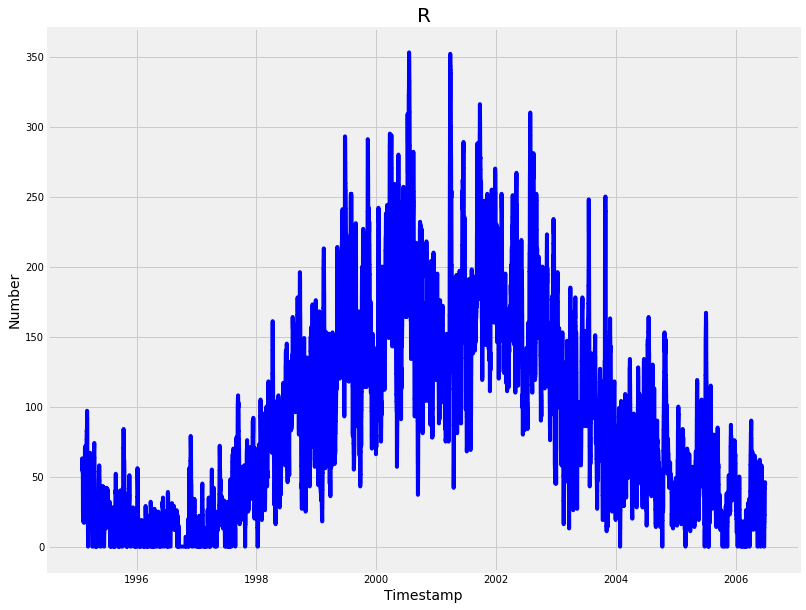

In [8]:
plt.figure(figsize=(12,10))
plt.plot(df_0.index, df_0['R (Sunspot No.)'], color='blue')

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.title('R', fontsize=20)

## 2.1.- f10.7 Index

Text(0.5, 1.0, 'f10.7 Index')

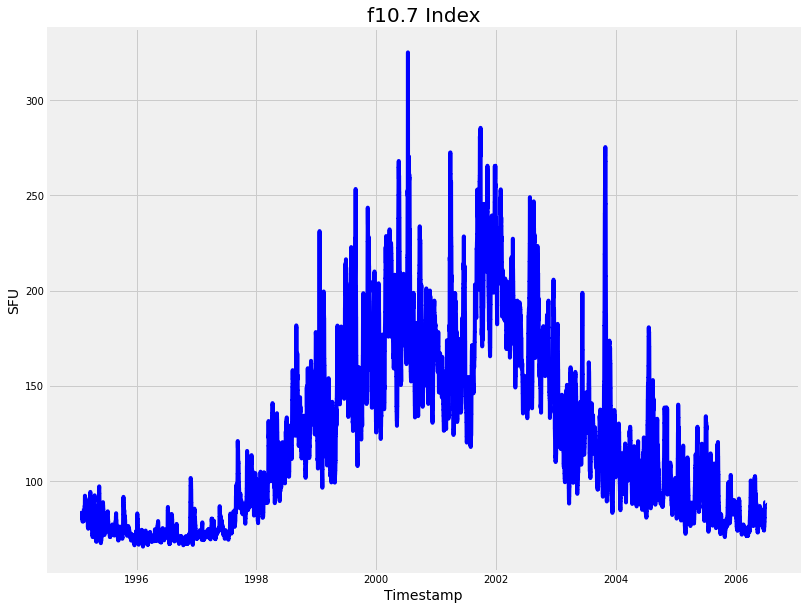

In [9]:
plt.figure(figsize=(12,10))
plt.plot(df_0.index, df_0['f10.7_index'], color='blue')

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('SFU', fontsize=14)
plt.title('f10.7 Index', fontsize=20)

## 2.2.- Lyman Alpha

Text(0.5, 1.0, 'Lyman Alpha')

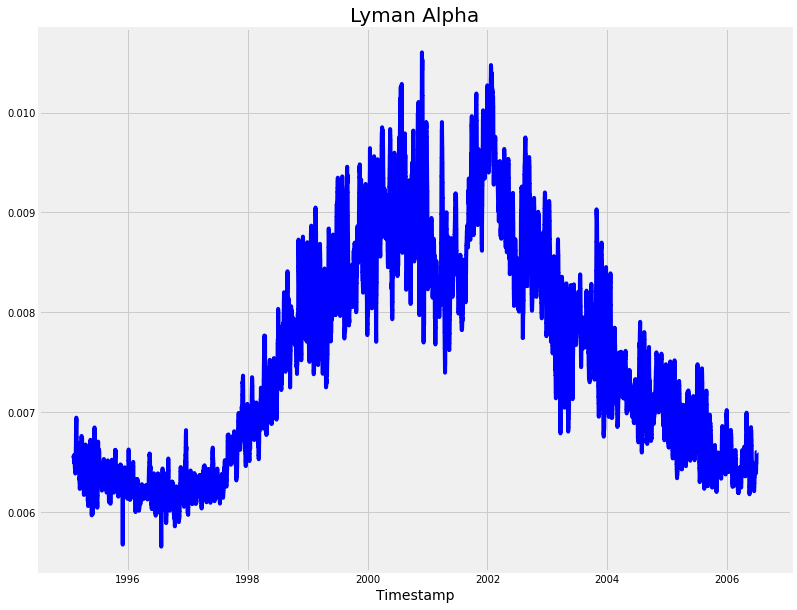

In [10]:
plt.figure(figsize=(12,10))
plt.plot(df_0.index, df_0['Lyman_alpha'], color='blue')

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Lyman Alpha', fontsize=20)

# 3.- High Solar Activity Period Identification

As observed in the above plots, there is a period with low solar activity during 2000-2001.

In [11]:
high_solar_activity1 = (df_0.index >= '2000-01-01 00:00:00') & (df_0.index < '2001-07-01 00:00:00')

In [12]:
df_1 = df_0[high_solar_activity1]

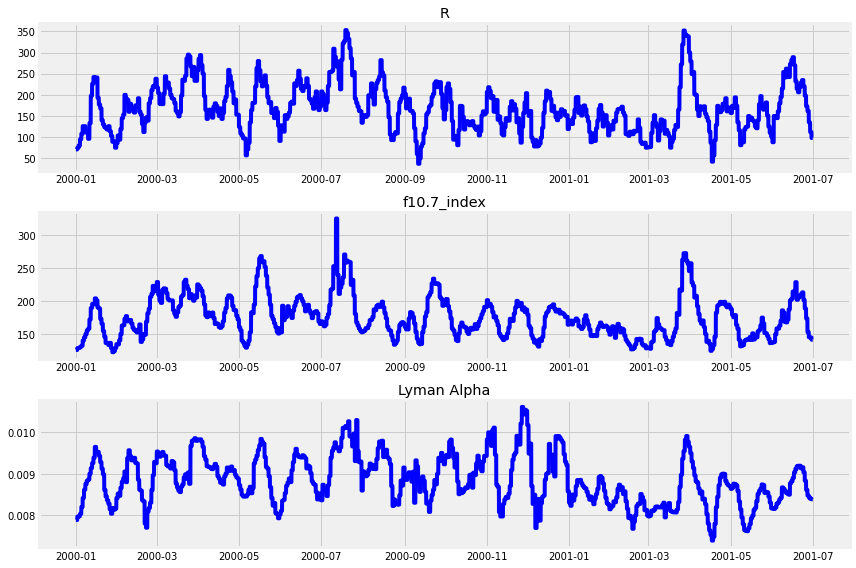

In [13]:
f = plt.figure(figsize=(12,8))
ax0 = f.add_subplot(311)
ax1 = f.add_subplot(312)
ax2 = f.add_subplot(313)

ax0.plot(df_1.index, df_1['R (Sunspot No.)'], color='blue')
ax0.title.set_text('R')

ax1.plot(df_1.index, df_1['f10.7_index'], color='blue')
ax1.title.set_text('f10.7_index')

ax2.plot(df_1.index, df_1['Lyman_alpha'], color='blue')
ax2.title.set_text('Lyman Alpha')

f.tight_layout()

Interestingly, we observe that for September-October 1996 the solar spot count was 0.

# 4.- High and low geomagnetic activity periods identification

## 4.1.- Kp Index*10

Text(0.5, 1.0, 'Kp')

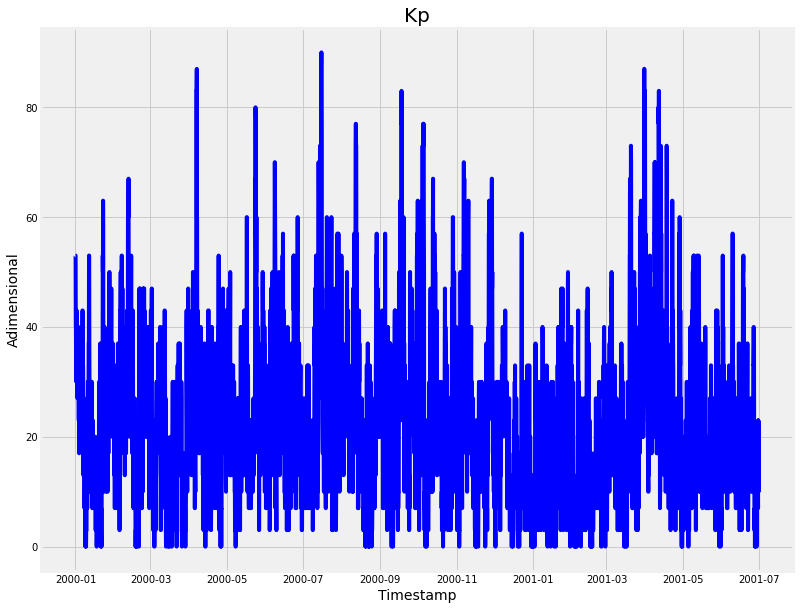

In [14]:
plt.figure(figsize=(12,10))
plt.plot(df_1.index, df_1['Kp index'], color='blue')

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Adimensional', fontsize=14)
plt.title('Kp', fontsize=20)

## 4.2.- $a_p$ Index

Text(0.5, 1.0, '$a_p$ Index')

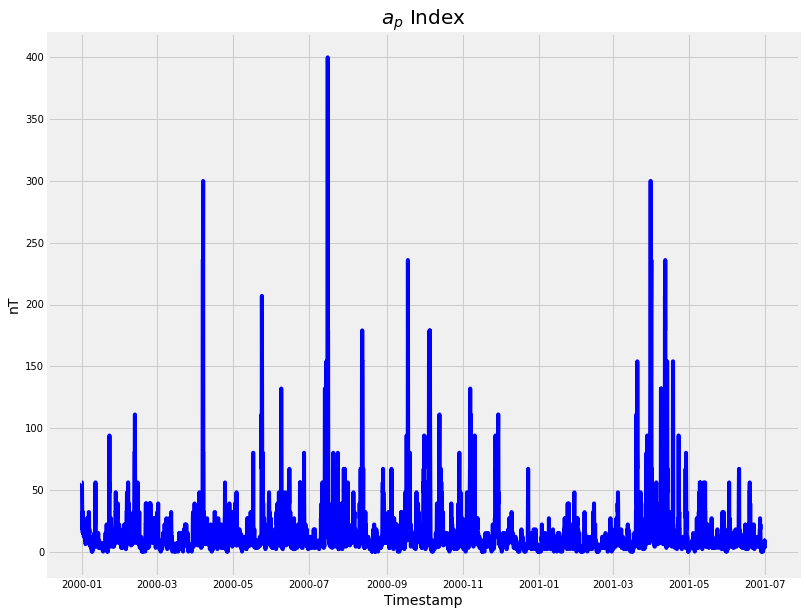

In [15]:
plt.figure(figsize=(12,10))
plt.plot(df_1.index, df_1['ap_index, nT'], color='blue')

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('$a_p$ Index', fontsize=20)

## 4.3.- DST Index

Text(0.5, 1.0, 'DST Index')

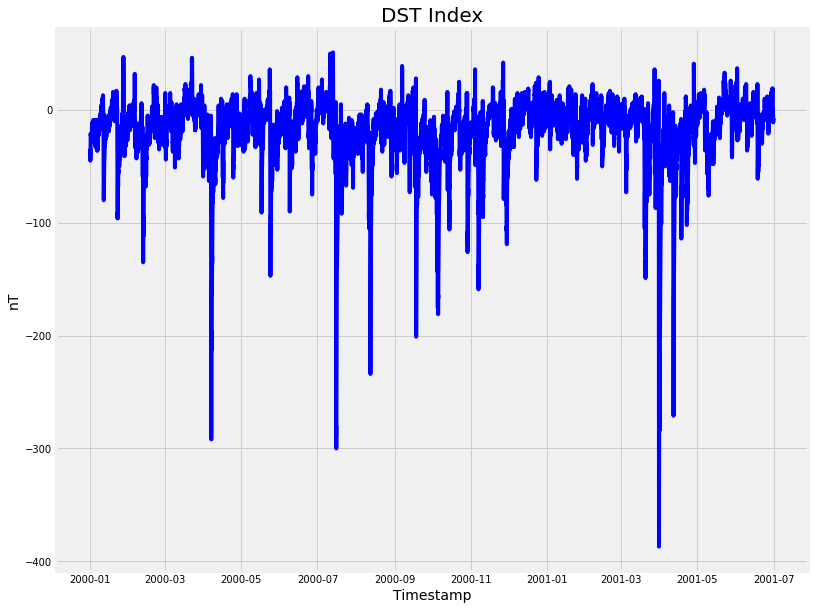

In [16]:
plt.figure(figsize=(12,10))
plt.plot(df_1.index, df_1['Dst-index, nT'], color='blue')

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('DST Index', fontsize=20)

## 4.5.- Period of low geomagnetic activity

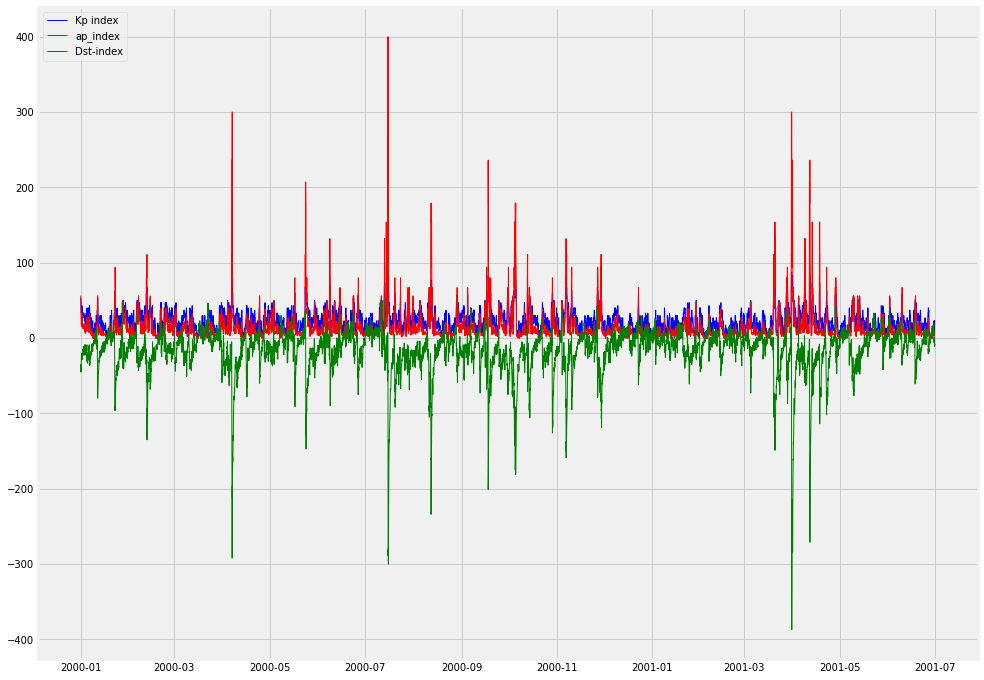

In [17]:
plt.figure(figsize=(15,12))
plt.plot(df_1.index, df_1['Kp index'], color='blue', label='Kp index',  linewidth=1)
plt.plot(df_1.index, df_1['ap_index, nT'], color='red', label='ap_index',  linewidth=1)
plt.plot(df_1.index, df_1['Dst-index, nT'], color='green', label='Dst-index',  linewidth=1)
plt.legend(loc='upper left')

From the above plots a period of low geomagnetic activity is observed for December 2000 through February 2001

In [18]:
low_geomagnetic_activity = (df_1.index >= '2000-12-01 00:00:00') & (df_1.index < '2001-03-01 00:00:00')

In [19]:
df_2 = df_1[low_geomagnetic_activity]

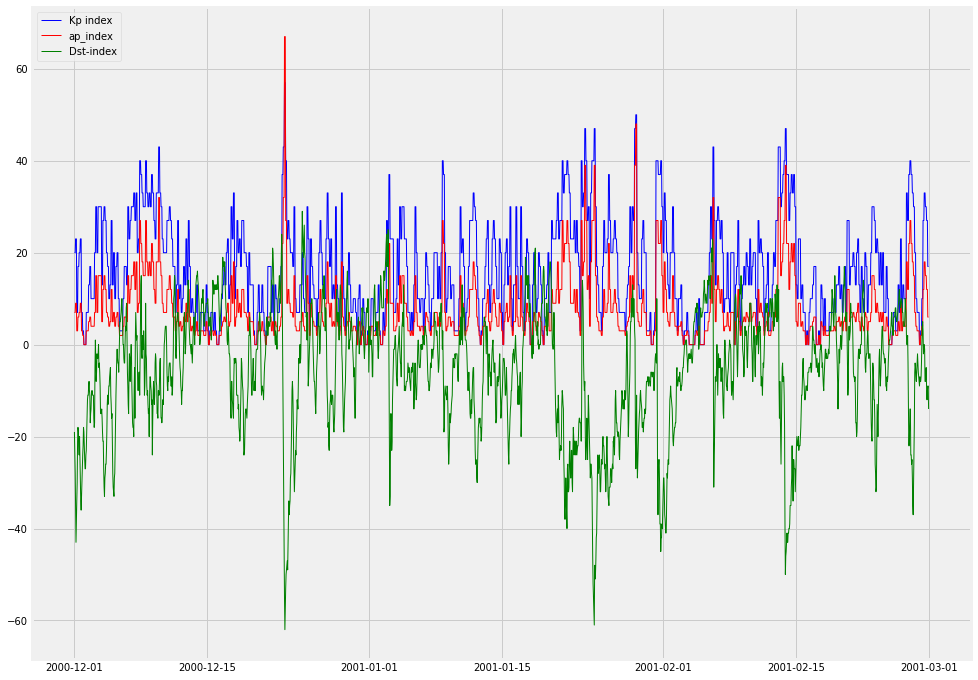

In [20]:
plt.figure(figsize=(15,12))
plt.plot(df_2.index, df_2['Kp index'], color='blue', label='Kp index',  linewidth=1)
plt.plot(df_2.index, df_2['ap_index, nT'], color='red', label='ap_index',  linewidth=1)
plt.plot(df_2.index, df_2['Dst-index, nT'], color='green', label='Dst-index',  linewidth=1)
plt.legend(loc='upper left')

We will now compare geomagnetic indexes stats for the whole of 1996 (df_1) and for the period of decreased geomagnetic activity (df_2):

In [21]:
df_1['Kp index'].describe()

count    13128.000000
mean        22.516910
std         14.519852
min          0.000000
25%         10.000000
50%         20.000000
75%         30.000000
max         90.000000
Name: Kp index, dtype: float64

In [22]:
df_2['Kp index'].describe()

count    2160.000000
mean       16.243056
std        10.960314
min         0.000000
25%         7.000000
50%        13.000000
75%        23.000000
max        57.000000
Name: Kp index, dtype: float64

In [23]:
df_1['ap_index, nT'].describe()

count    13128.000000
mean        14.336152
std         23.609107
min          0.000000
25%          4.000000
50%          7.000000
75%         15.000000
max        400.000000
Name: ap_index, nT, dtype: float64

In [24]:
df_2['ap_index, nT'].describe()

count    2160.000000
mean        7.550000
std         7.073904
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        67.000000
Name: ap_index, nT, dtype: float64

In [25]:
df_1['Dst-index, nT'].describe()

count    13128.000000
mean       -17.210771
std         29.173707
min       -387.000000
25%        -26.000000
50%        -12.000000
75%         -1.000000
max         51.000000
Name: Dst-index, nT, dtype: float64

In [26]:
df_2['Dst-index, nT'].describe()

count    2160.000000
mean       -5.816204
std        13.371626
min       -62.000000
25%       -13.000000
50%        -4.000000
75%         4.000000
max        29.000000
Name: Dst-index, nT, dtype: float64

We see that the mean and median of the indexes for the period of reduced geomagnetic activity are indeed lower.

In [27]:
len(df_2)

2160

In [28]:
df_2.index.min()

Timestamp('2000-12-01 00:00:00')

In [29]:
df_2.index.max()

Timestamp('2001-02-28 23:00:00')

In [30]:
df_2.reset_index(inplace=True)

In [31]:
df_2.to_csv("Data/HighSolar_LowGeomagnetic.csv", index=False)

## 4.6.- Period of high geomagnetic activity

A period of enhanced geomagnetic activity is identified between March and May 2001. 

In [32]:
high_geomagnetic_activity = (df_1.index >= '2001-03-15 00:00:00') & (df_1.index < '2001-05-01 00:00:00')

In [33]:
df_3 = df_1[high_geomagnetic_activity]

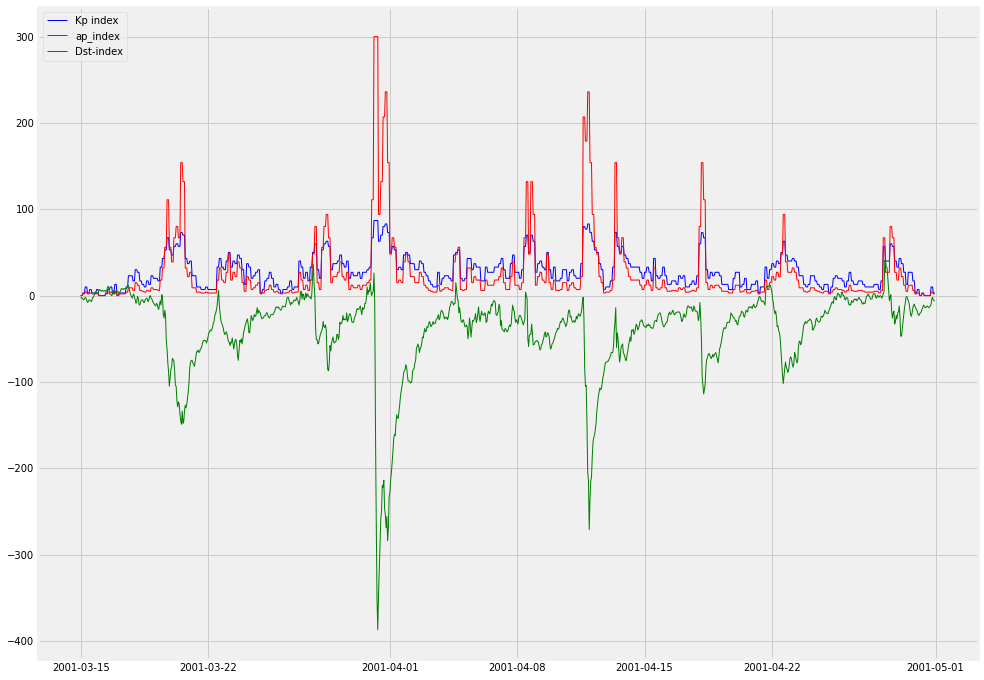

In [34]:
plt.figure(figsize=(15,12))
plt.plot(df_3.index, df_3['Kp index'], color='blue', label='Kp index',  linewidth=1)
plt.plot(df_3.index, df_3['ap_index, nT'], color='red', label='ap_index',  linewidth=1)
plt.plot(df_3.index, df_3['Dst-index, nT'], color='green', label='Dst-index',  linewidth=1)
plt.legend(loc='upper left')

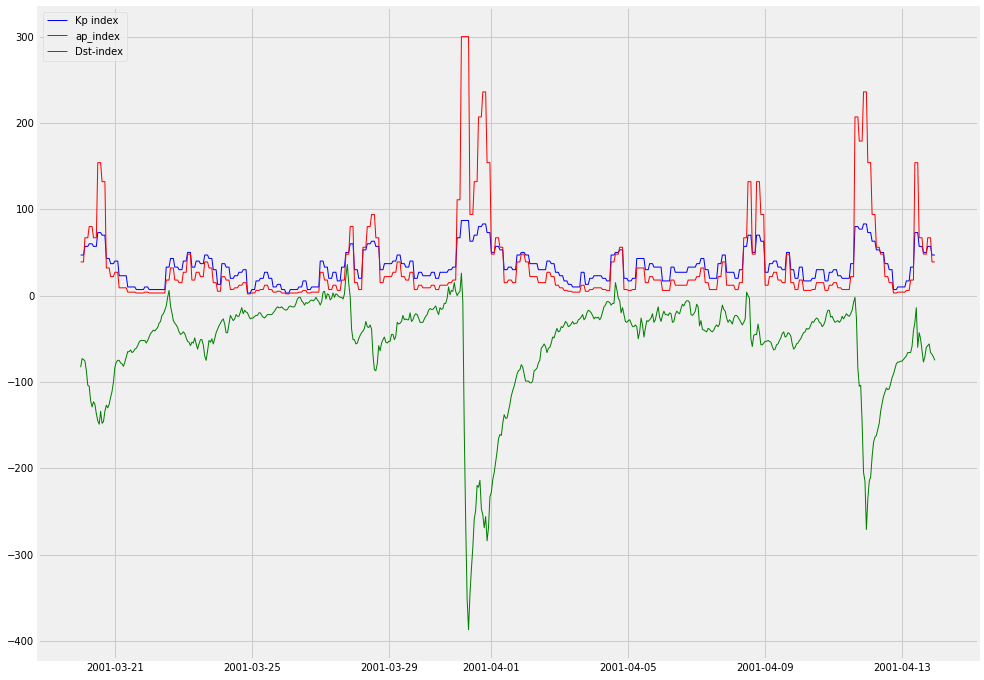

In [35]:
closer_look = (df_3.index >= '2001-03-20 00:00:00') & (df_3.index < '2001-04-14 00:00:00')
closer_look_df = df_3[closer_look]

plt.figure(figsize=(15,12))
plt.plot(closer_look_df.index, closer_look_df['Kp index'], color='blue', label='Kp index',  linewidth=1)
plt.plot(closer_look_df.index, closer_look_df['ap_index, nT'], color='red', label='ap_index',  linewidth=1)
plt.plot(closer_look_df.index, closer_look_df['Dst-index, nT'], color='green', label='Dst-index',  linewidth=1)
plt.legend(loc='upper left')
plt.grid(which='major', alpha=1)

We observe a large spike in geomagnetic activity around March 30th.

We will now compare geomagnetic indexes stats for the period of reduced geomagnetic activity (df_2) and for the period of increased geomagnetic activity (df_3):

In [36]:
df_2['Kp index'].describe()

count    2160.000000
mean       16.243056
std        10.960314
min         0.000000
25%         7.000000
50%        13.000000
75%        23.000000
max        57.000000
Name: Kp index, dtype: float64

In [37]:
df_3['Kp index'].describe()

count    1128.000000
mean       27.851064
std        18.526007
min         0.000000
25%        13.000000
50%        23.000000
75%        37.000000
max        87.000000
Name: Kp index, dtype: float64

In [38]:
df_2['ap_index, nT'].describe()

count    2160.000000
mean        7.550000
std         7.073904
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        67.000000
Name: ap_index, nT, dtype: float64

In [39]:
df_3['ap_index, nT'].describe()

count    1128.000000
mean       24.630319
std        41.080491
min         0.000000
25%         5.000000
50%         9.000000
75%        22.000000
max       300.000000
Name: ap_index, nT, dtype: float64

In [40]:
df_2['Dst-index, nT'].describe()

count    2160.000000
mean       -5.816204
std        13.371626
min       -62.000000
25%       -13.000000
50%        -4.000000
75%         4.000000
max        29.000000
Name: Dst-index, nT, dtype: float64

In [41]:
df_3['Dst-index, nT'].describe()

count    1128.000000
mean      -38.426418
std        48.429258
min      -387.000000
25%       -50.250000
50%       -26.000000
75%       -10.000000
max        41.000000
Name: Dst-index, nT, dtype: float64

We observe that the stats present increased mean and median in the period of enhanced geomagnetic activity.

In [42]:
len(df_3)

1128

In [43]:
df_3.index.min()

Timestamp('2001-03-15 00:00:00')

In [44]:
df_3.index.max()

Timestamp('2001-04-30 23:00:00')

In [45]:
df_3.reset_index(inplace=True)

In [46]:
df_3.to_csv("Data/HighSolar_HighGeomagnetic.csv", index=False)